In [1]:
from utils import *

## Problem statement

Fixed Income Portfolio Managers handling a portfolio of bonds, they are concerned with the change in PnL of their portfolio when there are shocks to the yield curve due to macro factors etc. PMs want to know how their portfolio will be affected by movements in the yield curve, they want to know what to expect in such events. At the same time, they are also able to construct a hypothetical portfolio and simulate yield curve changes to see its effects. 

The most important point is that the PM is able to simulate yield curve changes in the path that they expect the market to move and visualize how their portfolio will perform. This would help with decision making, which positions need to be hedged or adjusted. 

Yield Curve generated 

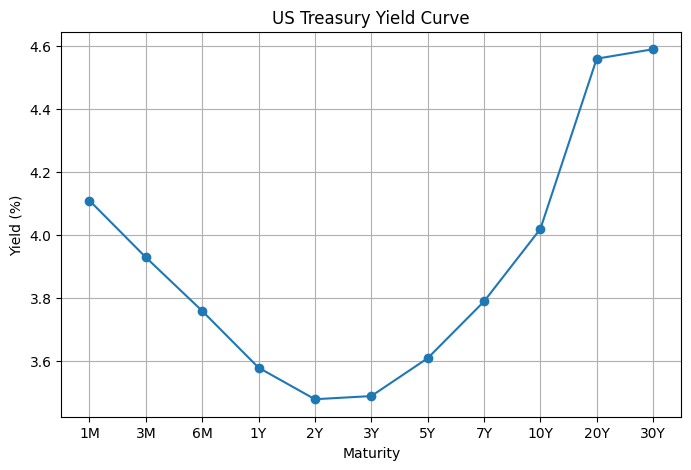

US Treasury Yields as of 2025-10-24: 
1M     4.11
3M     3.93
6M     3.76
1Y     3.58
2Y     3.48
3Y     3.49
5Y     3.61
7Y     3.79
10Y    4.02
20Y    4.56
30Y    4.59
Name: 2025-10-24 00:00:00, dtype: float64


In [2]:
lst_of_bonds = [
    Bond(1.7, 0.036),
    Bond(2, 0.04),
    Bond(3, 0.043),
    Bond(5, 0.045),
    Bond(5.5, 0.0453),
    Bond(7, 0.0476),
    Bond(10, 0.053),
]

yc = YieldCurve()
portfolio = Portfolio()
[portfolio.add_bonds(b) for b in lst_of_bonds]
print("Yield Curve generated", yc)

In [ ]:
yc_parallel_add_10 = yc.parallel_shift(10)
yc_parallel_minus_10 = yc.parallel_shift(-10)
yc_steepener = yc.bump_curve({"2Y": -10, "3Y": -5, "5Y": 2, "7Y": 4, "10Y": 6})
yc_flattener = yc.bump_curve({"2Y": 10, "3Y": 5, "5Y": -1, "7Y": -4, "10Y": -6})
curves = {
    "YieldCurve": yc,
    "YieldCurve_parallel_+10bps": yc_parallel_add_10,
    "YieldCurve_parallel_-10bps": yc_parallel_minus_10,
    "YieldCurve_steepener": yc_steepener,
    "YieldCurve_flattener": yc_flattener,
}


# compare_curves(curves)
# get_summary(portfolio, curves)
# get_heatmap(portfolio, curves)
# get_heatmap(portfolio, curves, True)

Visual Plots of the different yield curves generated. PMs can construct any kind of yield curve they would like. From there, they can value their portfolio and calculate the change in PnL that can be decomposed into different bucket of tenors if they'd like to. 

Ideally, I would like to make the curve construction a clickable feature. PMs have the option to slowly drag and modify the shape of the yield curve instead of inputting numbers manually. Having this simple option will be a very valuable quality of life feature for the users because they can immediately start playing around with the curve. 

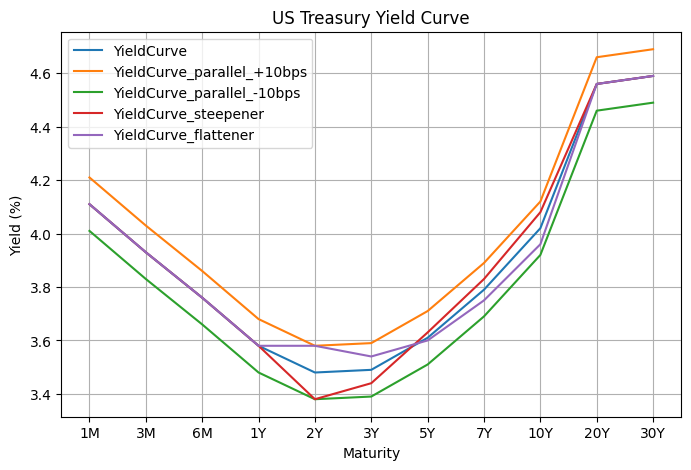

In [7]:
compare_curves(curves)

The values below represent the percentage change in portfolio PnL ($) resulting from shifts in the yield curve.

In [10]:
get_summary(portfolio, curves)

,parallel_+10bps % Change in PnL,parallel_-10bps % Change in PnL,steepener % Change in PnL,flattener % Change in PnL
2025-10-24,-0.41,0.42,-0.04,0.03


Bonds in the portfolio have been bucketed to the nearest years. Heatmap allows us to visualize the portfolio's sensitivity with respect to the yield curve shifts and tenor buckets.

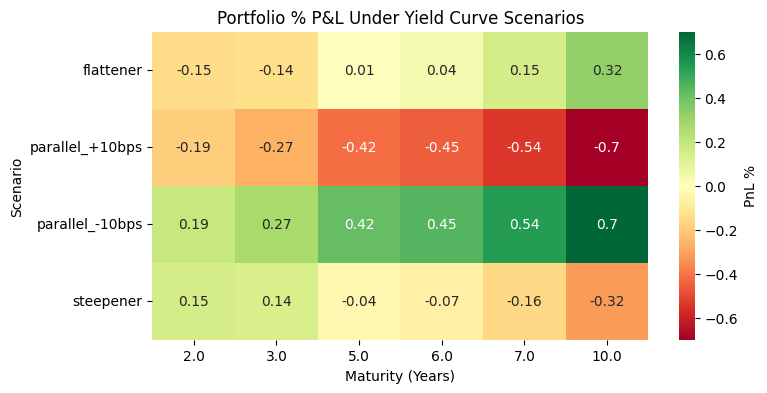

In [15]:
get_heatmap(portfolio, curves, True)

#### Sample scenario analysis
In the event that the yield curve steepens, we can see that long maturity bonds will lose PnL and the PM can decide how he wants to hedge his portfolio. He could either sell off some 10s or long more 2s, etc.

## Summary

This notebook simulates a bond portfolio, calculates price changes under different yield curve scenarios, and visualizes P&L impacts. It provides PMs with fast, actionable insight into interest rate risk across maturities, highlighting which positions are most sensitive and how potential market moves would affect the portfolio.


All core components — Yield Curve, Bond, and Portfolio classes were implemented from scratch.

# TODO

- Build Vanilla Swap class for inclusion into the portfolio
- Expose curves to more countries/markets
- Setup config file for hardcode and dummy portfolio and curves
- We can add more details/analytics about the portfolio such as Duration, Convexity (measure of interest rate sensitivity), bucketed dv01 risk for the portfolio